### Implementation of Neural Network from scratch using NumPy

In this lab we are going to implement the 2-layer Neural Network (Input Layer, 1-hidden layer and Output Layer).

In [2]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)

In this lab, we are going to use the data in "dataset.csv". This data has two input features called x1, x2 and an output variable called target. It is a binary classification problem.

In [3]:
# Read the data
df = pd.read_csv("dataset.csv")
df.shape


(200, 3)

In [5]:
df.head()

,x1,x2,target
0,1.065701,1.645795,1.0
1,0.112153,1.005711,1.0
2,-1.469113,0.598036,1.0
3,-1.554499,1.034249,1.0
4,-0.097040,-0.146800,0.0


In [6]:
# Let's print the distribution of the target variable in class 0 & 1
df['target'].value_counts()

0.0    103
1.0     97
Name: target, dtype: int64

Text(0.5, 1.0, 'Distribution of the target variable')

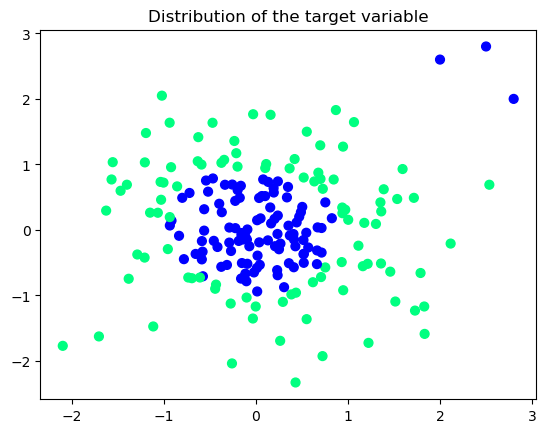

In [7]:
# Let's plot the distribution of the target variable
plt.scatter(df['x1'], df['x2'], c=df['target'].values.reshape(200,), s=40, cmap='winter')
plt.title('Distribution of the target variable')

In [8]:
# Let's prepare the data for model training
X = df[['x1','x2']].values.T
Y = df['target'].values.reshape(1,-1)
X.shape,Y.shape

((2, 200), (1, 200))

In [9]:
m = X.shape[1]             # m - No. of training samples

# Set the hyperparameters
n_x = 2                    # No. of neurons in first layer
n_h = 10                   # No. of neurons in hidden layer
n_y = 1                    # No. of neurons in output layer
num_of_iters = 1000
learning_rate = 0.3

In [10]:
# Define the sigmoid activation function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [11]:
# Initialize weigth & bias parameters
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x)
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)
    b2 = np.zeros((n_y, 1))

    parameters = {
        "W1": W1,
        "b1" : b1,
        "W2": W2,
        "b2" : b2
      }
    return parameters

### Forward Feed (Forward Propagation)

In [12]:
# Function for forward propagation
def forward_prop(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = {
      "A1": A1,
      "A2": A2
     }
    return A2, cache

### Loss Function

In [13]:
# Function to calculate the loss (log loss)
def calculate_cost(A2, Y):
    cost = -np.sum(np.multiply(Y, np.log(A2)) +  np.multiply(1-Y, np.log(1-A2)))/m
    cost = np.squeeze(cost)
    return cost

### BackPropagation

In [14]:
# Function for back-propagation
def backward_prop(X, Y, cache, parameters):
    A1 = cache["A1"]
    A2 = cache["A2"]

    W2 = parameters["W2"]

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T)/m
    db2 = np.sum(dZ2, axis=1, keepdims=True)/m
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1-np.power(A1, 2))
    dW1 = np.dot(dZ1, X.T)/m
    db1 = np.sum(dZ1, axis=1, keepdims=True)/m

    grads = {
    "dW1": dW1,
    "db1": db1,
    "dW2": dW2,
    "db2": db2
    }

    return grads

### Update Weights

In [15]:
# Function to update the weigth & bias parameters
def update_parameters(parameters, grads, learning_rate):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2

    new_parameters = {
    "W1": W1,
    "W2": W2,
    "b1" : b1,
    "b2" : b2
    }

    return new_parameters

### Complete Model

In [16]:
# Define the Model
def model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate,display_loss=False):
    parameters = initialize_parameters(n_x, n_h, n_y)

    for i in range(0, num_of_iters+1):
        a2, cache = forward_prop(X, parameters)

        cost = calculate_cost(a2, Y)

        grads = backward_prop(X, Y, cache, parameters)

        parameters = update_parameters(parameters, grads, learning_rate)
        
        if display_loss:
            if(i%100 == 0):
                print('Cost after iteration# {:d}: {:f}'.format(i, cost))

    return parameters

In [17]:
trained_parameters = model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate,display_loss=True)


Cost after iteration# 0: 0.727895
Cost after iteration# 100: 0.438707
Cost after iteration# 200: 0.308236
Cost after iteration# 300: 0.239390
Cost after iteration# 400: 0.200191
Cost after iteration# 500: 0.175058
Cost after iteration# 600: 0.157424
Cost after iteration# 700: 0.144189
Cost after iteration# 800: 0.133626
Cost after iteration# 900: 0.124717
Cost after iteration# 1000: 0.116933


In [18]:
# Define function for prediction
def predict(parameters, X):
    A2, cache = forward_prop(X,parameters)
    predictions = A2 > 0.5
    
    return predictions

In [19]:
# Define function to plot the decision boundary
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap='winter')
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y.reshape(200,), cmap=plt.cm.Spectral)

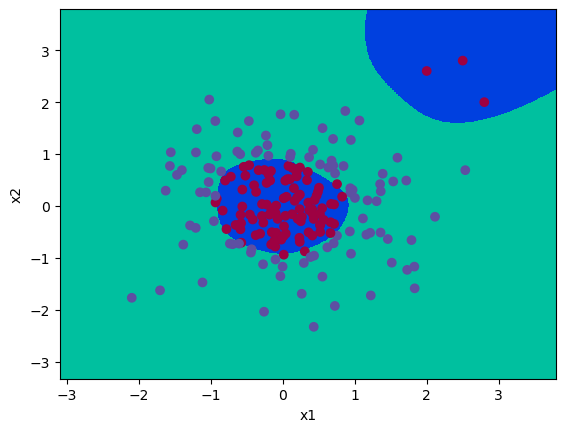

In [20]:
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(trained_parameters, x.T), X, Y)

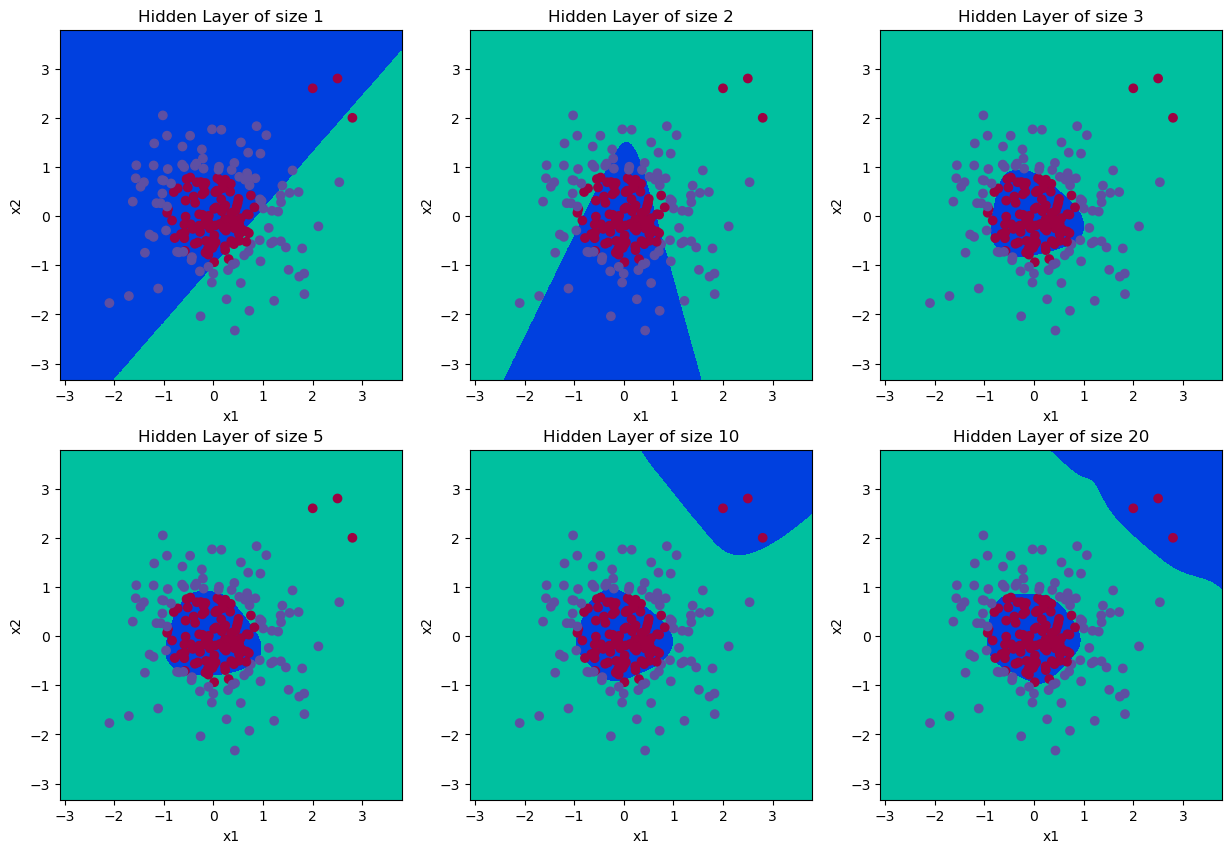

In [21]:
# Let's see how our Neural Network work with different hidden layer sizes
plt.figure(figsize=(15, 10))
hidden_layer_sizes = [1, 2, 3, 5, 10,20]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(2, 3, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    
    parameters = model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)

https://studymachinelearning.com/implementation-of-neural-network-from-scratch-using-numpy/